# 고객세분화
- 클러스터링
- kMeans, DBSCAN
- boxplot

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 데이터 읽기

In [2]:
!curl https://raw.githubusercontent.com/ShubhankarRawat/Mall-Customers-Segmentation/master/data.csv\
    -o customer.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3780  100  3780    0     0  10708      0 --:--:-- --:--:-- --:--:-- 10708


In [3]:
!head -10 customer.csv

CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [4]:
df = pd.read_csv('customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# 원 핫 인코딩

In [8]:
# 성별을 One Hot Encoding 
df = pd.get_dummies(df, columns = ['Gender'], prefix = ['Gender'])
df[:5]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [9]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

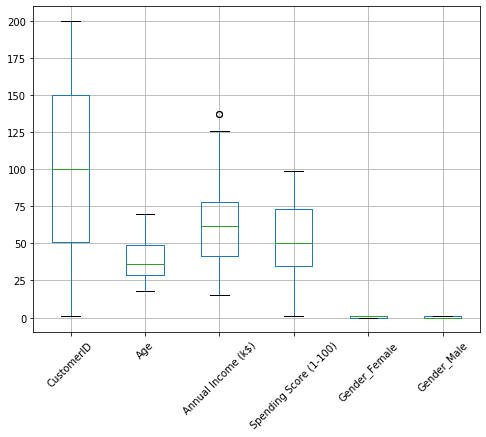

In [10]:
df.boxplot(figsize=(8,6))
plt.xticks(rotation=45)

# 두 개의 컬럼(특성)만 사용 (연속 값)

Text(0, 0.5, 'Spending Score (1-100)')

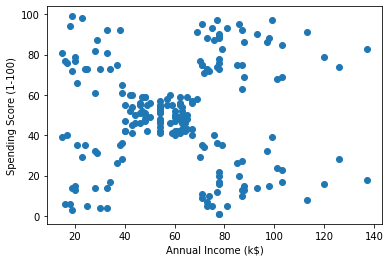

In [11]:
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
# plt.scatter(df.iloc[:,2], df.iloc[:,3])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

## 스케일링

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
continuous = ['Annual Income (k$)', 'Spending Score (1-100)']
df_scale = scaler.fit_transform(df[continuous])
df_scale[:3]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298]])

In [13]:
df[:3]

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0


## 최적의 클러스터 수 찾기

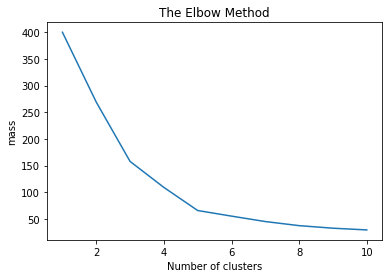

In [14]:
mass = []
for i in range(1, 11):
    # kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scale)
    mass.append(kmeans.inertia_)
plt.plot(range(1, 11), mass)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('mass')
plt.show()

# kMeans
- 두 개의 특성만 사용

In [0]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(df_scale)

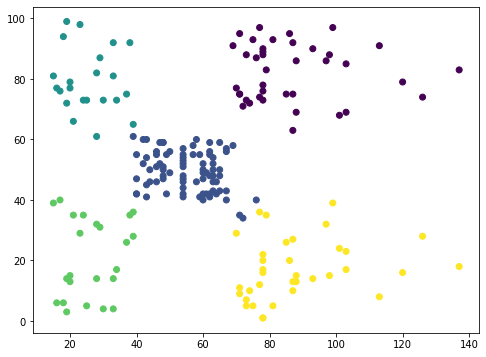

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=y_kmeans)

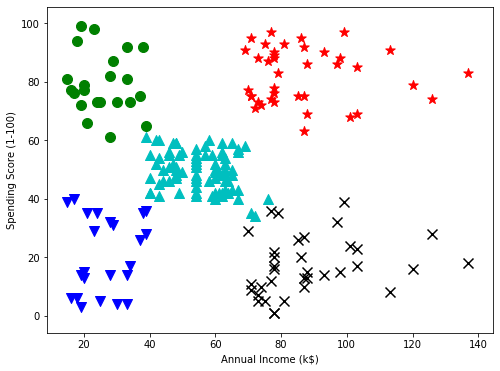

In [17]:
my_markers=['*','^', 'o','v','x',',']
my_color =['r','c','g','b','k','y']
# kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)

plt.figure(figsize=(8, 6))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
for n in range(df.shape[0]):
    label = y_kmeans[n]
    plt.scatter(df['Annual Income (k$)'][n], df['Spending Score (1-100)'][n], c=my_color[label], marker=my_markers[label], s=100)   

In [18]:
y_kmeans, kmeans.labels_

(array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
        3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 1, 0, 4, 0, 4, 0,
        1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
        4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
        4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
        4, 0], dtype=int32),
 array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
        3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1,
        3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1

In [19]:
df["cluster"] = y_kmeans
df.head(5)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,1,19,15,39,0,1,3
1,2,21,15,81,0,1,2
2,3,20,16,6,1,0,3
3,4,23,16,77,1,0,2
4,5,31,17,40,1,0,3


In [20]:
df.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Gender_Female', 'Gender_Male', 'cluster'],
      dtype='object')

In [0]:
df = df.drop(['CustomerID','cluster'], axis=1)
df_new=df.copy()
df_new[continuous] = scaler.fit_transform(df_new[continuous])

In [22]:
df_new[:3]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,19,-1.738999,-0.434801,0,1
1,21,-1.738999,1.195704,0,1
2,20,-1.700830,-1.715913,1,0


# 모든 특성 사용

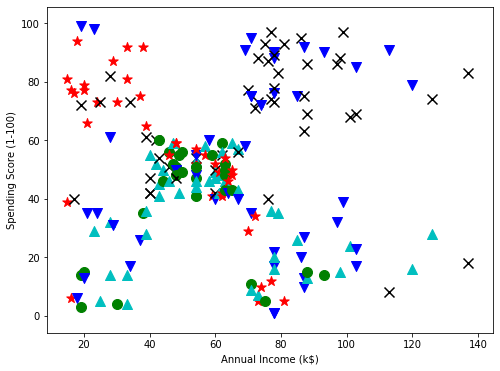

In [24]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(df_new)
plt.figure(figsize=(8, 6))
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
for n in range(df.shape[0]):
    label = y_kmeans[n]
    plt.scatter(df['Annual Income (k$)'][n], df['Spending Score (1-100)'][n], 
                c=my_color[label], marker=my_markers[label], s=100)   

In [25]:
df_new['cluster'] = y_kmeans
df_new[:20]

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male,cluster
0,19,-1.738999,-0.434801,0,1,0
1,21,-1.738999,1.195704,0,1,0
2,20,-1.700830,-1.715913,1,0,0
3,23,-1.700830,1.040418,1,0,0
4,31,-1.662660,-0.395980,1,0,4
5,22,-1.662660,1.001596,1,0,0
6,35,-1.624491,-1.715913,1,0,3
7,23,-1.624491,1.700384,1,0,0
8,64,-1.586321,-1.832378,0,1,2
9,30,-1.586321,0.846310,1,0,4


# 밀도 기반 클러스터링
- DBSCAN 사용
- kMeans는 거리 기반 클러스터링

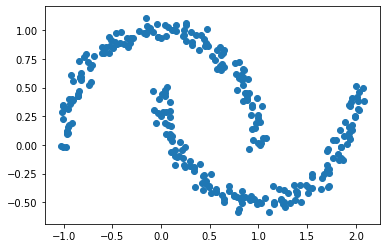

In [26]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
X, y = make_moons(n_samples=300, noise=0.05, random_state=11)
plt.scatter(X[:,0], X[:,1])
plt.show()

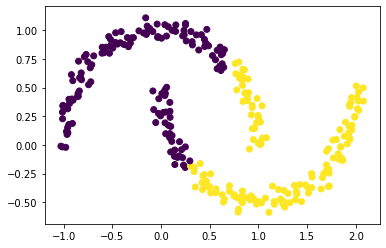

In [27]:
kmeans = KMeans(n_clusters=2)
predict = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

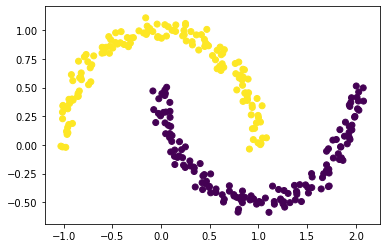

In [28]:
dbscan = DBSCAN(eps=0.2, min_samples=10, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

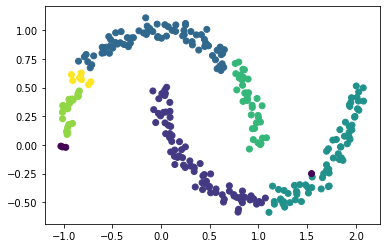

In [29]:
dbscan = DBSCAN(eps=0.1, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=predict)

## 고객 세분화에 적용

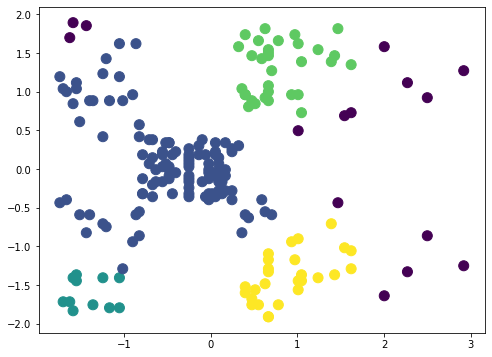

In [30]:
dbscan = DBSCAN(eps=0.4, min_samples=5, metric='euclidean')
predict = dbscan.fit_predict(df_scale)
plt.figure(figsize=(8, 6))
# plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=predict)
plt.scatter(df_scale[:,0], df_scale[:,1], c=predict, s=100)

In [31]:
predict

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  3,  2,  3,  2,  0,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  0,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2,  3,  2, -1,  2,  3,
       -1,  3,  2,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1])